<a href="https://colab.research.google.com/github/yuyangweng/Project/blob/main/peak_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Peak** **Fitting**


In [2]:
pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 292 kB 4.4 MB/s 
     |████████████████████████████████| 98 kB 3.3 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84413 sha256=7c98f26764f6dea0fa4baf62f93843d77aa36bfd934ed164141b5a6fc6e2e701
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
Successfully built lmfit


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
from lmfit import Model
from numpy import exp, pi, sqrt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,peak_widths

In [5]:
data_path = '/content/drive/MyDrive/1.csv'
headers = ['raman_shift', 'intensity']
df = pd.read_csv(data_path, names=headers)

In [6]:
df

,raman_shift,intensity
0,1054.109619,-11.634156
1,1055.092589,-11.634156
2,1056.075560,-11.634156
3,1057.058530,-11.634156
4,1058.041500,-11.634156
...,...,...
1995,3015.135258,20.742223
1996,3016.118228,10.371119
1997,3017.101198,0.000000
1998,3018.084168,0.000000


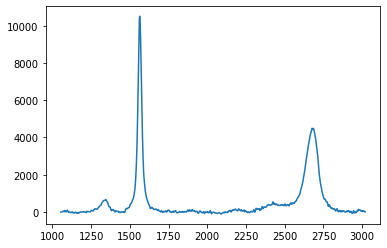

In [7]:
plt.plot(df.raman_shift,df.intensity)

In [8]:


def gaussian(x, amp, cen, wid):
    return (amp * exp(-(x-cen)**2 / (2*wid**2)))

143    1194.674364
144    1195.657334
145    1196.640305
146    1197.623275
147    1198.606245
          ...     
444    1490.548408
445    1491.531378
446    1492.514348
447    1493.497319
448    1494.480289
Name: raman_shift, Length: 306, dtype: float64
Model 0
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 306
    # variables        = 3
    chi-square         = 1386717.63
    reduced chi-square = 4576.62584
    Akaike info crit   = 2582.17269
    Bayesian info crit = 2593.34344
[[Variables]]
    amp:  613.860376 +/- 11.6649688 (1.90%) (init = 655.1589)
    cen:  1335.64759 +/- 0.61395176 (0.05%) (init = 1345.069)
    wid:  27.9771224 +/- 0.61395176 (2.19%) (init = 30.66685)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) = -0.577
----------------------------------------------------------------------------------------------------
447    1493.497319
448    1494.480289
449    

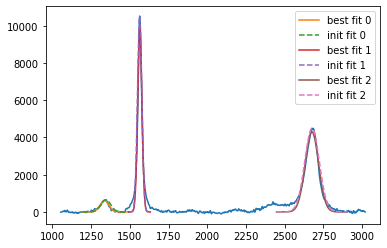

In [22]:
peaks, _ = find_peaks(df.intensity, height=500,distance=150,width=20)
widths=peak_widths(df.intensity, peaks, rel_height=0.5)

wid=widths[0]/2
gmodel = Model(gaussian)
plt.plot(df.raman_shift, df.intensity)


for index, peak in enumerate(peaks):
  range=int(wid[index]*5)

  x=df.raman_shift[peak-range:peak+range]
  y=df.intensity[peak-range:peak+range]
  result = gmodel.fit(y, x=x, amp=df.intensity[peak], cen=df.raman_shift[peak], wid=wid[index])
  plt.plot(x, result.best_fit, '-', label='best fit '+str(index))
  plt.plot(x, result.init_fit, '--', label='init fit '+str(index))
  print("Model "+str(index))
  print(result.fit_report())
  print('-'*100)
  
plt.legend()
plt.show()


------------------------------
[[Model]]
    Model(pvoigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 418
    # data points      = 368
    # variables        = 4
    chi-square         = 9402101.88
    reduced chi-square = 25829.9502
    Akaike info crit   = 3742.59681
    Bayesian info crit = 3758.22914
[[Variables]]
    amplitude:  57681.9879 +/- 3574.10055 (6.20%) (init = 351416.5)
    center:     1336.92282 +/- 1.43502734 (0.11%) (init = 1396.648)
    sigma:      28.2370216 +/- 2.84864187 (10.09%) (init = 105.6693)
    fraction:   0.96362288 +/- 0.17385910 (18.04%) (init = 0.5)
    fwhm:       56.4740431 +/- 5.69728373 (10.09%) == '2.0000000*sigma'
    height:     661.487923 +/- 37.3799474 (5.65%) == '(((1-fraction)*amplitude)/max(1e-15, (sigma*sqrt(pi/log(2))))+(fraction*amplitude)/max(1e-15, (pi*sigma)))'
[[Correlations]] (unreported correlations are < 0.250)
    C(sigma, fraction)     = -0.702
    C(amplitude, fraction) = 0.564
-----------------

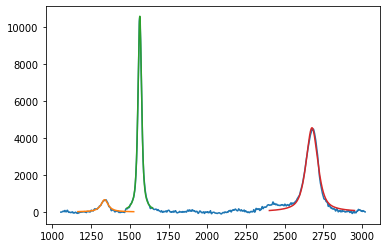

In [29]:
import numpy as np
from lmfit.models import PseudoVoigtModel


# x=df.raman_shift
# y=df.intensity

peaks, _ = find_peaks(df.intensity, height=500,distance=150,width=20)
widths=peak_widths(df.intensity, peaks, rel_height=0.5)

wid=widths[0]/2
gmodel = Model(gaussian)
plt.plot(df.raman_shift, df.intensity)


for index, peak in enumerate(peaks):
  range=int(wid[index]*6)
  x=df.raman_shift[peak-range:peak+range].to_numpy() 
  y=df.intensity[peak-range:peak+range].to_numpy() 
  mod = PseudoVoigtModel()
  pars = mod.guess(y, x=x)
  out = mod.fit(y, pars, x=x)
  print('-'*30)
  print(out.fit_report(min_correl=0.25))
  plt.plot(x, out.best_fit, '-', label='best fit '+str(index))
  

